Treinaremos com 7212 elementos e testaremos com 2404 elementos para a tensao nominal
A acurácia da tensao nominal foi 57.32%


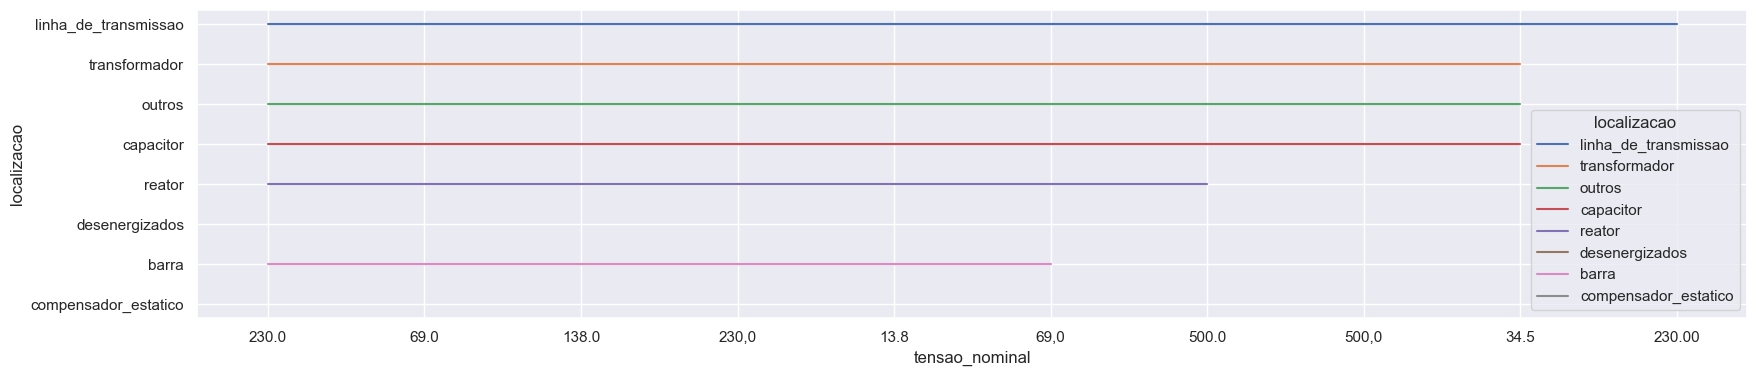

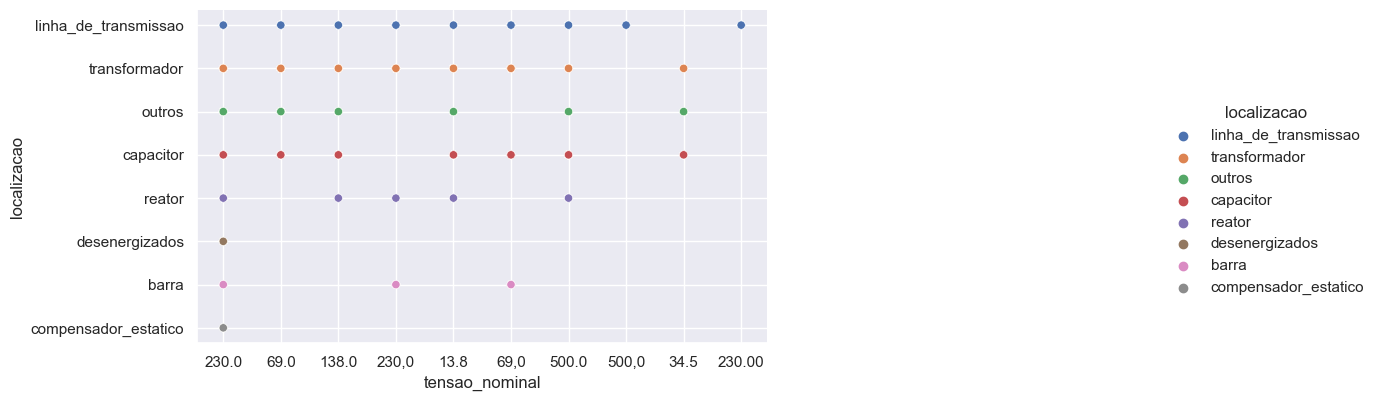

In [46]:
import pandas as pd
import util as util
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import seaborn as sns

data_seccionadores = pd.read_csv('dados/seccionador.csv', sep=",", encoding='ISO-8859-1', low_memory=False)

data = util.clear_data(data_seccionadores)
data = util.rename_columns(data)
data = util.clear_tensao_nominal(data)
data_tensao_nominal = util.apply_one_hot_encoding(data,
                                                  ['localizacao','nome_fabricante','sigla_subestacao'])

x = data_tensao_nominal.drop(["tensao_nominal"], axis=1)
x.head()

y = data_tensao_nominal["tensao_nominal"]
y.head()

model = LinearSVC()

# separar base de treino: contem as caracteristicas (treino_x) e as classes (treino_y) preenchidas
SEED = 20
treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=SEED, stratify=y)
print("Treinaremos com %d elementos e testaremos com %d elementos para a tensao nominal" % (len(treino_x), len(teste_x)))

#treino_x.to_csv('dados/treino_x.csv', index=False, encoding='utf-8')
#treino_y.to_csv('dados/treino_y.csv', index=False, encoding='utf-8')

model.fit(treino_x, treino_y)
predictions = model.predict(teste_x)
accuracy = accuracy_score(teste_y, predictions) * 100
print("A acurácia da tensao nominal foi %.2f%%" % accuracy)

#print(treino_y.value_counts())
#print(teste_y.value_counts())

ax = sns.lineplot(data=data,x="tensao_nominal",y="localizacao",hue="localizacao")
ax.figure.set_size_inches(w=20,h=4)
ax

ax = sns.relplot(data=data,x="tensao_nominal",y="localizacao",hue="localizacao")
ax.figure.set_size_inches(w=20,h=4)
ax
